In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

Deploy hyperparameters

In [2]:
input_size = 784       # The image size = 28 x 28 = 784
hidden_size = 500      # The number of nodes at the hidden layer
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 5         # The number of times entire dataset is trained
batch_size = 100       # The size of input data took for one iteration
learning_rate = 0.001 # The speed of convergence

Download data set


In [4]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
transform=transforms.ToTensor())

Load data set

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
shuffle=False)

Building the model. The crazyness

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

loss function and optimizer

In [7]:
#instance of the Conv Net
cnn = CNN();

#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate);

Train the model

In [23]:
losses = [];
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item());
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))

Epoch : 1/5, Iter : 100/600,  Loss: 0.0032
Epoch : 1/5, Iter : 200/600,  Loss: 0.0031
Epoch : 1/5, Iter : 300/600,  Loss: 0.0067
Epoch : 1/5, Iter : 400/600,  Loss: 0.0002
Epoch : 1/5, Iter : 500/600,  Loss: 0.0121
Epoch : 1/5, Iter : 600/600,  Loss: 0.0115
Epoch : 2/5, Iter : 100/600,  Loss: 0.0027
Epoch : 2/5, Iter : 200/600,  Loss: 0.0005
Epoch : 2/5, Iter : 300/600,  Loss: 0.0129
Epoch : 2/5, Iter : 400/600,  Loss: 0.0077
Epoch : 2/5, Iter : 500/600,  Loss: 0.0009
Epoch : 2/5, Iter : 600/600,  Loss: 0.0007
Epoch : 3/5, Iter : 100/600,  Loss: 0.0040
Epoch : 3/5, Iter : 200/600,  Loss: 0.0076
Epoch : 3/5, Iter : 300/600,  Loss: 0.0049
Epoch : 3/5, Iter : 400/600,  Loss: 0.0007
Epoch : 3/5, Iter : 500/600,  Loss: 0.0012
Epoch : 3/5, Iter : 600/600,  Loss: 0.0023
Epoch : 4/5, Iter : 100/600,  Loss: 0.0085
Epoch : 4/5, Iter : 200/600,  Loss: 0.0005
Epoch : 4/5, Iter : 300/600,  Loss: 0.0213
Epoch : 4/5, Iter : 400/600,  Loss: 0.0008
Epoch : 4/5, Iter : 500/600,  Loss: 0.0101
Epoch : 4/5

Same error again (Variable/Tensor merge). Solution was changing "loss.data[0] to loss.item()_"

**Note ran the training again**

In [24]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.float())
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 98.0000 %


Ahh, CNN is better! Accuracy improved to 99%

**After running the training again..98%..hmm?!**

Let's visualise the loss

In [15]:
losses_in_epochs = losses[0::600]
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses_in_epochs);
plt.show();

NameError: name 'plt' is not defined

Error, hmm...I never imported the relevant libraries?

In [16]:
import matplotlib.pyplot as plt

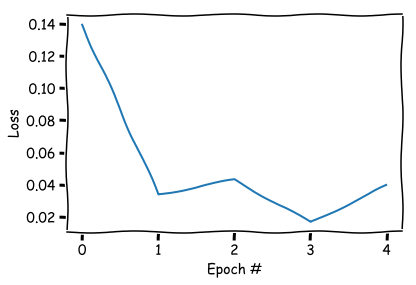

In [17]:
losses_in_epochs = losses[0::600]
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses_in_epochs);
plt.show();

Let's visualize the filters

<Figure size 432x288 with 0 Axes>

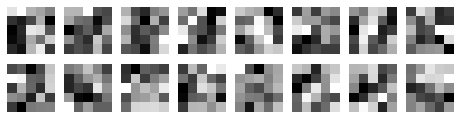

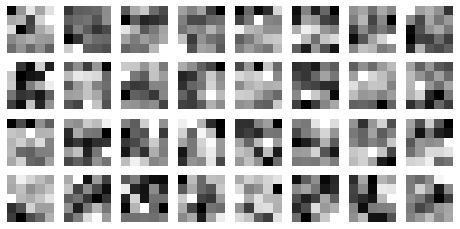

In [21]:
def plot_kernels(tensor, num_cols=6):
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(num_kernels):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i][0,:,:], cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

filters = cnn.modules();
model_layers = [i for i in cnn.children()];
first_layer = model_layers[0];
second_layer = model_layers[1];

first_kernels = first_layer[0].weight.data.numpy()
plot_kernels(first_kernels, 8)

second_kernels = second_layer[0].weight.data.numpy()
plot_kernels(second_kernels, 8)